<a href="https://colab.research.google.com/github/qcasey305/Airline_Ratings_Analysis/blob/master/Airline_Ratings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Introduction**


**Dataframe Overview**



*   Scraped dataset of Airline reviews from Skytrax (www.airlinequality.com) 
*   41396 total reviews
*   Date range: 1970-01-01 to 2015-08-02
*   Source: [Github](https://github.com/quankiquanki/skytrax-reviews-dataset)




**Data Dictionary**

- airline_name = name of commercial airline
- link = link to review page for airline
- title = '[Airline Name] customer review'
- author = First Initial and Last Name of Reviewer
- author_country = Country of Residence of reviewer
- date = Date review was submitted
- content = freeform content of review
- aircraft = Aircraft type
- type_traveller = reason for travel: Business, Couple, Leisure, Family Leisure, Solo Leisure
- cabin_flown = cabin type: Business Class, Economy, First Class, Premium Economy
- route = Departing airport to Arrival airport
- overall_rating = overall experience rating (1-10)
- seat_comfort_rating = seat comfort rating (1-10)
- cabin_staff_rating = cabin staff rating (1-10)
- food_beverages_rating = food and beverages rating (1-10)
- inflight_entertainment_rating = in-flight entertainment rating (1-10)
- ground_service_rating = ground service rating (1-10)
- wifi_connectivity_rating = wifi connectivity rating (1-10)
- value_money_rating = airline value for money (1-10)
- recommended = Would you recommend this airline, yes or no (0 or 1)?




**Problem Statement**

What effects do country of residence, cabin type, and reason for travel have on a person's airline review?

**Hypotheses**

1.   There will be a correlation between country of origin of reviewers and average airline reviews
2.   The more premium the cabin type, the higher the overall rating and seat comfort rating for the airline experience
3. The less premium the cabin type, the the lower the overall rating and seat comfort rating for the airline experience
   - However, the less premium the cabin type, the higher the value for money.


# **Loading the Dataframe**

**Import Analysis Modules**

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print('pandas import successful')

pandas import successful


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import CSV**

In [0]:
skytrax_orig = pd.read_csv('https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/airline.csv')
reviews = skytrax_orig.copy()
print('dataset loaded successfully')

dataset loaded successfully


**See Description of Dataframe**

In [0]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41396 entries, 0 to 41395
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   41396 non-null  object 
 1   link                           41396 non-null  object 
 2   title                          41396 non-null  object 
 3   author                         41396 non-null  object 
 4   author_country                 39805 non-null  object 
 5   date                           41396 non-null  object 
 6   content                        41396 non-null  object 
 7   aircraft                       1278 non-null   object 
 8   type_traveller                 2378 non-null   object 
 9   cabin_flown                    38520 non-null  object 
 10  route                          2341 non-null   object 
 11  overall_rating                 36861 non-null  float64
 12  seat_comfort_rating            33706 non-null 

**Preview one row of Dataframe**

In [0]:
print(reviews.iloc[0])

airline_name                                                         adria-airways
link                                                /airline-reviews/adria-airways
title                                                Adria Airways customer review
author                                                                       D Ito
author_country                                                             Germany
date                                                                    2015-04-10
content                          Outbound flight FRA/PRN A319. 2 hours 10 min f...
aircraft                                                                       NaN
type_traveller                                                                 NaN
cabin_flown                                                                Economy
route                                                                          NaN
overall_rating                                                                   7
seat

**See total number of Airlines are featured in the Dataframe.**



In [0]:
len(reviews.airline_name.unique())

362

**See total number of reviewer countries of residence are featured in the Dataframe.**

In [82]:
len(reviews.author_country.unique())

159

# **Clean the Dataframe**

**Delete the link column and the title column as they are not necessary in our analysis.**

In [0]:
reviews.drop(columns=['link', 'title'], inplace=True)
#note: inplace = True will permanently change the Dataframe order

**Sort the Dataframe by overall rating in descending order.**

In [0]:
reviews.sort_values(by=['overall_rating'], ascending=False, inplace=True, na_position='last')
#note: inplace = True will permanently change the Dataframe order

# **Analysis**

**Find the mean, median, and mode of overall rating for the entire Dataframe**

In [0]:
print('The overall rating mean is', reviews['overall_rating'].mean())
print('The overall rating median is', reviews['overall_rating'].median())
print('The overall rating mode is', reviews['overall_rating'].mode())
#bimodal

The overall rating mean is 6.039526871218904
The overall rating median is 7.0
The overall rating mode is 0    10.0
dtype: float64


**Plot the overall ratings of the Dataframe in a simple histogram to see a visual representations of the distribution (with and without KDE).**

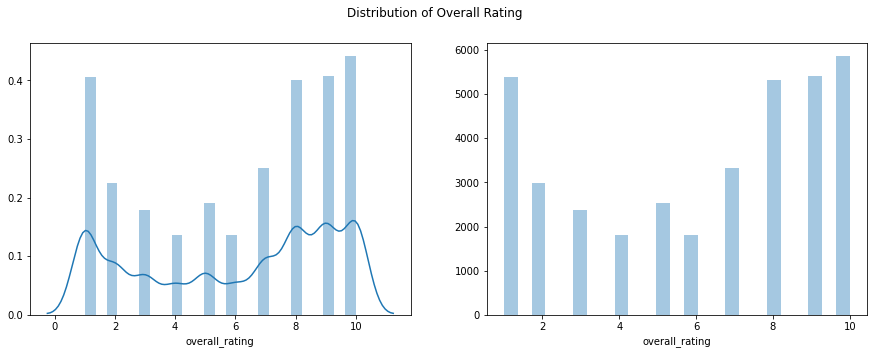

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
fig.suptitle('Distribution of Overall Rating')
sns.distplot(reviews['overall_rating'], ax=ax1)
sns.distplot(reviews['overall_rating'], kde=False, ax=ax2)

plt.show()

#bimodal / sort of left-skewed distribution

**Understand the audience breakdown of the Dataframe.**

Create a histogram of number of reviews by country.

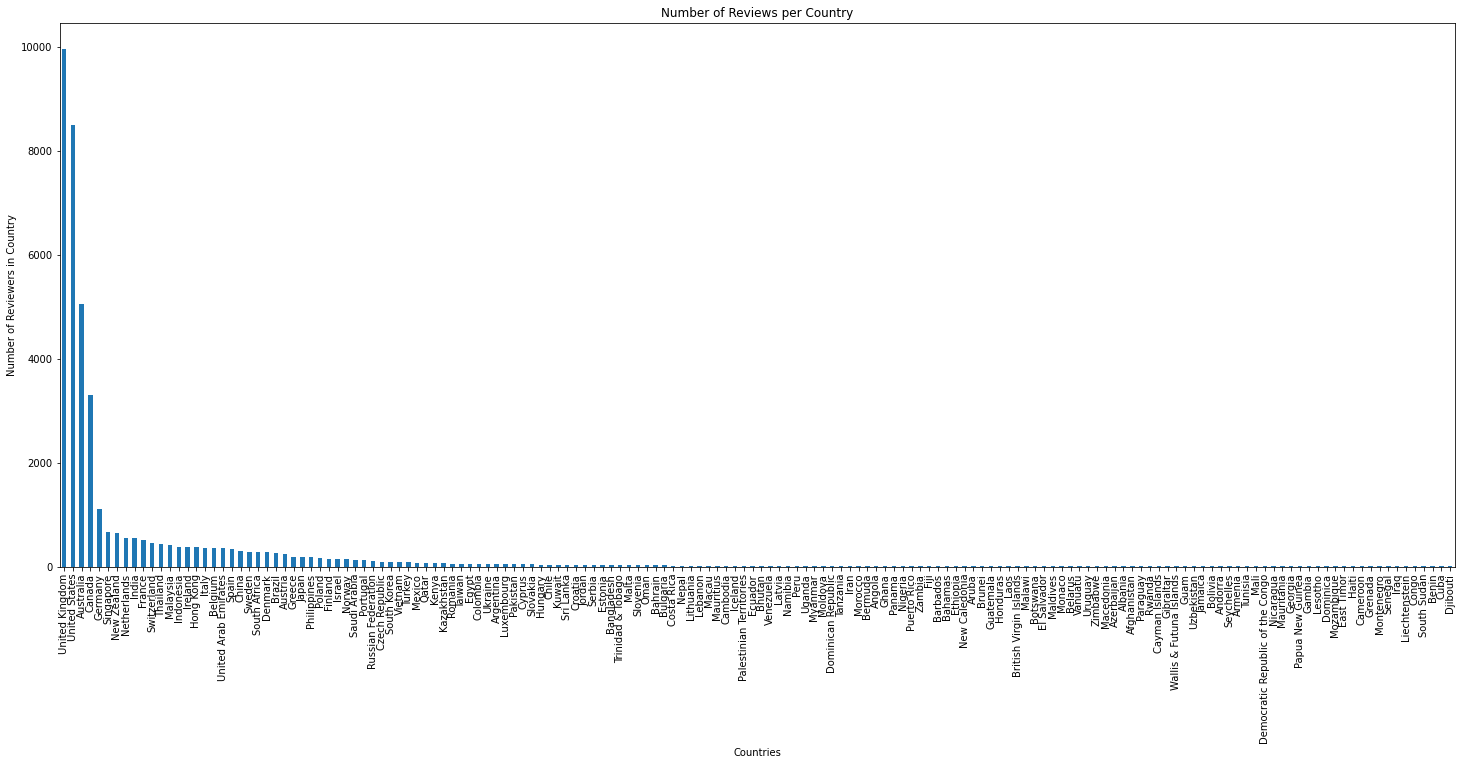

In [74]:
reviews['author_country'].value_counts().plot(kind='bar', figsize=(25, 10))
plt.ylabel('Number of Reviewers in Country')
plt.xlabel('Countries')
plt.title('Number of Reviews per Country');

**Create a pivot table that depicts overall rating by country.**

In [36]:
reviews.groupby('author_country')[['overall_rating']].mean().sort_values(by=['overall_rating'], ascending=False, inplace=False, na_position='last')
#how do i get it to show every row???
#how to not show Nan values?

,overall_rating
author_country,
Gambia,10.0
East Timor,10.0
Dominica,10.0
Gibraltar,10.0
Lesotho,10.0
...,...
Bolivia,1.0
Cameroon,NaN
Grenada,NaN


**Country of Residence vs. Airline Ratings**

According to [World Atlas](https://www.worldatlas.com/articles/countries-whose-citizens-travel-the-most.html), these are the countries who travel the most (i.e. highest number of trips per person per year):
*   Finland
*   USA
- Sweden
- Denmark
- Norway
- Hong Kong
- New Zealand
- Canada
- Australia
- France

> Are reviewers  from these top travel countries more critical than average?




In [0]:
gb = reviews.groupby('author_country')
finland = gb.get_group('Finland')

print('The Finland mean rating for overall rating is', finland['overall_rating'].mean())
print('The Finland mean rating for cabin staff rating is', finland['cabin_staff_rating'].mean())
print('The Finland mean rating for food and beverage rating is', finland['food_beverages_rating'].mean())
print('The Finland mean rating for in-flight entertainment rating is', finland['inflight_entertainment_rating'].mean())

The Finland mean rating for overall rating is 6.666666666666667
The Finland mean rating for cabin staff rating is 3.5867768595041323
The Finland mean rating for food and beverage rating is 2.8925619834710745
The Finland mean rating for in-flight entertainment rating is 2.4


In [0]:

print('The Dataframe mean rating for overall rating is', reviews['overall_rating'].mean())
print('The Dataframe mean rating for cabin staff rating is', reviews['cabin_staff_rating'].mean())
print('The Dataframe mean rating for food and beverage rating is', reviews['food_beverages_rating'].mean())
print('The Dataframe mean rating for in-flight entertainment rating is', reviews['inflight_entertainment_rating'].mean())

The Dataframe mean rating for overall rating is 6.039526871218904
The Dataframe mean rating for cabin staff rating is 3.3192120564851075
The Dataframe mean rating for food and beverage rating is 2.8058862433862433
The Dataframe mean rating for in-flight entertainment rating is 2.392363566240278


How do Finland's means for these categories stack up to the Dataframe means?

- Finland's mean for *overall rating* **>** Dataframe's mean for *overall rating*
- Finland's mean for *cabin_staff_rating* **>** Dataframe's mean for *cabin_staff_rating*
- Finland's mean for *food_beverages_rating* **=** Dataframe's mean for *inflight_entertainment_rating*


> Although Finland travels the most per capita, their average reviews fall very close to or above the averages for the entire Dataframe. 





In [40]:
top_countries = gb.get_group('Finland','United States', 'Sweden', 'Denmark', 'Norway', 'Hong Kong', 'New Zealand','Canada','Australia','France')

#Trying to make a bar chart with mean ratings by these top 10 as well as the means for the whole dataframe...
#ideally like a stacked bar chart
#would like to do the same for the top rated airlines


TypeError: ignored

**Cabin Class Ratings**

In [0]:
reviews.pivot_table(index=('cabin_flown'),values=['overall_rating','seat_comfort_rating'], aggfunc = 'mean').unstack()

#why does this not show up as a real pivot table? :(

                     cabin_flown    
overall_rating       Business Class     6.874939
                     Economy            5.974157
                     First Class        6.651300
                     Premium Economy    5.856747
seat_comfort_rating  Business Class     3.616658
                     Economy            2.986317
                     First Class        3.740325
                     Premium Economy    3.150485
dtype: float64

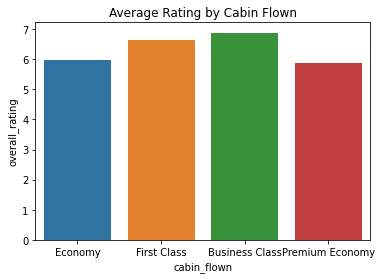

In [71]:
sns.barplot(x='cabin_flown', y='overall_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Rating by Cabin Flown')
plt.show()

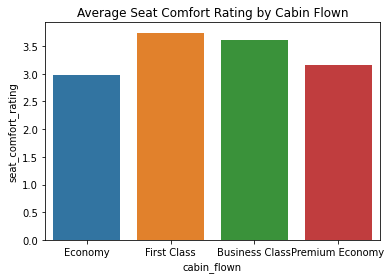

In [56]:
sns.barplot(x='cabin_flown', y='seat_comfort_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Seat Comfort Rating by Cabin Flown')
plt.show()

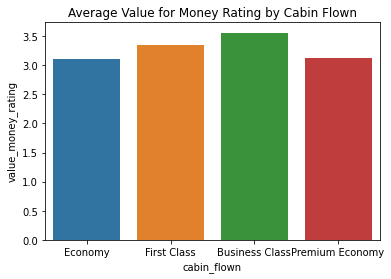

In [63]:
sns.barplot(x='cabin_flown', y='value_money_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Value for Money Rating by Cabin Flown')
plt.show()

In [62]:
reviews['year'] = pd.DatetimeIndex(reviews['date']).year

print(reviews['year'].unique())


# WTF is the min date... so confused how it could. be 1970..?

[2015 2010 2014 2011 2013 2012 2009 2008 2007 1970 2006 2005 2004 2003
 2002]


**Traveller Type Ratings**

In [76]:
reviews.pivot_table(index=('type_traveller'),values=['overall_rating','seat_comfort_rating','food_beverages_rating','inflight_entertainment_rating'], aggfunc = 'mean').unstack()


                               type_traveller
food_beverages_rating          Business          2.738170
                               Couple Leisure    2.829114
                               FamilyLeisure     2.821206
                               Solo Leisure      2.972644
inflight_entertainment_rating  Business          2.714844
                               Couple Leisure    2.915254
                               FamilyLeisure     2.815718
                               Solo Leisure      3.006000
overall_rating                 Business          4.513812
                               Couple Leisure    4.828619
                               FamilyLeisure     4.703764
                               Solo Leisure      5.364428
seat_comfort_rating            Business          2.803867
                               Couple Leisure    2.745424
                               FamilyLeisure     2.714754
                               Solo Leisure      2.986216
dtype: float64

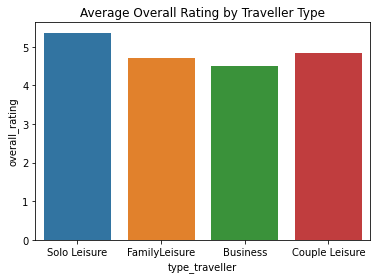

In [78]:
sns.barplot(x='type_traveller', y='overall_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Overall Rating by Traveller Type')
plt.show()

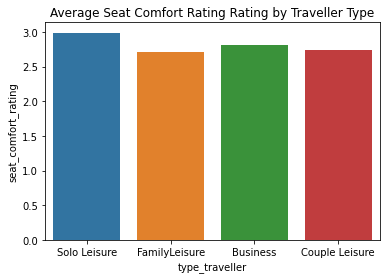

In [79]:
sns.barplot(x='type_traveller', y='seat_comfort_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Seat Comfort Rating Rating by Traveller Type')
plt.show()

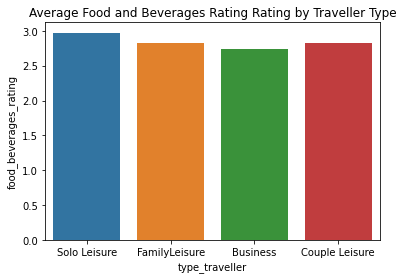

In [80]:
sns.barplot(x='type_traveller', y='food_beverages_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Food and Beverages Rating Rating by Traveller Type')
plt.show()

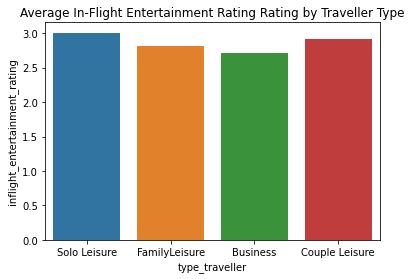

In [81]:
sns.barplot(x='type_traveller', y='inflight_entertainment_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average In-Flight Entertainment Rating Rating by Traveller Type')
plt.show()

# **Insights**